In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [4]:
N = 1000
psi = np.zeros(N)
g2 = 200 # gamma squared
v = (-1) * np.ones(N) # potential array
ep = -0.9 # trial energy
k2 = g2 * (ep - v) # k squared
l2 = (1.0 / (N-1))**2 # l squared

def wavefunction(ep, k2, N): # finds wave function
    psi[0] = 0 # set initial value
    psi[1] = 1e-4
    
    for i in range(2, N):
        psi[i] = (2 * (1 - (5.0/12) * l2 * k2[i-1]) * psi[i-1]
        -(1 + (1.0/12) * l2 * k2[i-2]) *psi[i-2])/(1 + (1.0/12) * l2 *k2[i])
    return psi / np.sqrt(integrate.simps(psi**2, dx=1))

psi = wavefunction(ep, k2, N)

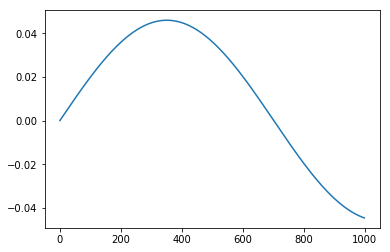

In [5]:
plt.plot(psi)

In [6]:
# function to find eigenstates
def epsilon(eps, deps, N): # takes trial energy, change in energy, N
    psi = np.zeros(N)
    k2 = g2 * (eps - v) # update k each time
    psi = wavefunction(psi, k2, N)
    p1 = psi[N-1]
    eps = eps + deps
    
    while abs(deps) > 1e-12: # sets the accuracy(end point ~= 0)
        k2 = g2 * (eps - v)
        psi = wavefunction(psi, k2, N)
        p2 = psi[N-1]
        
        if p1 * p2 < 0: # if ther is a sign change
            deps = -deps / 2.0
            
        eps = eps + deps
        p1 = p2
    return k2, eps

In [34]:
N = 1000
psi = np.zeros(N)
g2 = 200 # gamma squared
v = (-1) * np.ones(N) # potential array
ep = -0.9 # trial energy
k2 = g2 * (ep - v) # k squared
l2 = (1.0 / (N-1))**2 # l squared

psi = np.zeros(N)
k2, eps = epsilon(ep, -0.1, N)
psi = wavefunction(eps, k2, N)

In [35]:
psi = psi / np.sqrt(integrate.simps(psi**2, dx=1))
print(eps)

-0.9506519779948576


In [36]:
sum(psi**2)

0.9999999967002539

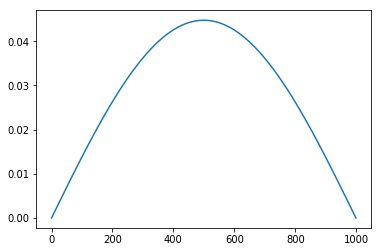

In [37]:
plt.plot(psi)